In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1).astype('float32')
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1).astype('float32')

train_X = train_X / 255
test_X = test_X / 255

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 10)


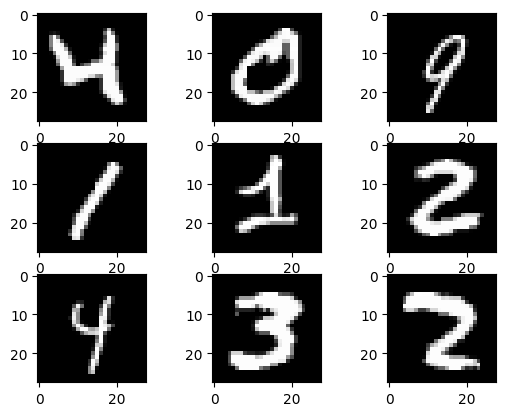

In [4]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i+20], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np
class CNN:
    def __init__(self):
        self.model = self.build_model()
    def build_model(self):
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    def train(self,train_x,train_y,test_x,test_y):
        self.model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200, verbose=2)
    def evaluate(self,test_x,test_y):
        scores = self.model.evaluate(test_X, test_y, verbose=0)
        accuracy = scores[1]*100
        print("Accuracy: %.2f%%" % accuracy)

    def predict(self, test_X):
        return self.model.predict(test_X)
    def save(self, filename):
        self.model.save(filename)

model=CNN()
model.train(train_X,train_y,test_X,test_y)
model.evaluate(test_X,test_y)

d:\Study\Projects\get_torched\torchvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 12s - 39ms/step - accuracy: 0.9188 - loss: 0.2858 - val_accuracy: 0.9773 - val_loss: 0.0742
Epoch 2/10
300/300 - 8s - 27ms/step - accuracy: 0.9794 - loss: 0.0675 - val_accuracy: 0.9860 - val_loss: 0.0411
Epoch 3/10
300/300 - 8s - 26ms/step - accuracy: 0.9850 - loss: 0.0479 - val_accuracy: 0.9835 - val_loss: 0.0509
Epoch 4/10
300/300 - 8s - 26ms/step - accuracy: 0.9880 - loss: 0.0378 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 5/10
300/300 - 8s - 25ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9905 - val_loss: 0.0307
Epoch 6/10
300/300 - 8s - 25ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 7/10
300/300 - 8s - 26ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9910 - val_loss: 0.0304
Epoch 8/10
300/300 - 8s - 26ms/step - accuracy: 0.9932 - loss: 0.0194 - val_accuracy: 0.9918 - val_loss: 0.0290
Epoch 9/10
300/300 - 8s - 27ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9911 - val_loss

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import numpy as np
class ConvolutionTest:
    def __init__(self):
        self.model = self.build_model()
    def build_model(self):
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    def train(self,train_x,train_y,test_x,test_y):
        self.model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200, verbose=2)
    def evaluate(self,test_x,test_y):
        scores = self.model.evaluate(test_X, test_y, verbose=0)
        accuracy = scores[1]*100
        print("Accuracy: %.2f%%" % accuracy)

    def predict(self, test_X):
        return self.model.predict(test_X)
    def save(self, filename):
        self.model.save(filename)
    def summary(self):
        self.model.summary()


model=ConvolutionTest()
model.summary()
model.train(train_X,train_y,test_X,test_y)
model.evaluate(test_X,test_y)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,642 (397.04 KB)

 Trainable params: 101,642 (397.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
300/300 - 10s - 35ms/step - accuracy: 0.8281 - loss: 0.5256 - val_accuracy: 0.9767 - val_loss: 0.0743
Epoch 2/10
300/300 - 7s - 24ms/step - accuracy: 0.9659 - loss: 0.1261 - val_accuracy: 0.9814 - val_loss: 0.0547
Epoch 3/10
300/300 - 7s - 22ms/step - accuracy: 0.9773 - loss: 0.0859 - val_accuracy: 0.9852 - val_loss: 0.0467
Epoch 4/10
300/300 - 8s - 25ms/step - accuracy: 0.9815 - loss: 0.0673 - val_accuracy: 0.9883 - val_loss: 0.0369
Epoch 5/10
300/300 - 8s - 26ms/step - accuracy: 0.9854 - loss: 0.0549 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 6/10
300/300 - 8s - 28ms/step - accuracy: 0.9872 - loss: 0.0485 - val_accuracy: 0.9895 - val_loss: 0.0306
Epoch 7/10
300/300 - 8s - 27ms/step - accuracy: 0.9888 - loss: 0.0402 - val_accuracy: 0.9924 - val_loss: 0.0292
Epoch 8/10
300/300 - 8s - 26ms/step - accuracy: 0.9904 - loss: 0.0362 - val_accuracy: 0.9915 - val_loss: 0.0279
Epoch 9/10
300/300 - 8s - 26ms/step - accuracy: 0.9911 - loss: 0.0325 - val_accuracy: 0.9919 - val_loss

In [88]:
import numpy as np

from PIL import Image

def max_pooling(input_matrix, pool_size=(2, 2), stride=(2, 2)):
    """
    Performs max pooling on the input matrix.

    Parameters:
    input_matrix (numpy.ndarray): The input matrix to perform max pooling on.
    pool_size (tuple): The size of the pooling window, default is (2, 2).
    stride (tuple): The stride of the pooling operation, default is (2, 2).

    Returns:
    numpy.ndarray: The pooled matrix.
    """
    input_height, input_width, channels = input_matrix.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride


    output_height = int((input_height - pool_height) / stride_height) + 1
    output_width = int((input_width - pool_width) / stride_width) + 1


    pooled_matrix = np.zeros((output_height, output_width, channels))

    for c in range(channels):
        for i in range(0, output_height):
            for j in range(0, output_width):
                start_i = i * stride_height
                start_j = j * stride_width
                end_i = start_i + pool_height
                end_j = start_j + pool_width
                pooled_matrix[i, j, c] = np.max(input_matrix[start_i:end_i, start_j:end_j, c])

    return pooled_matrix

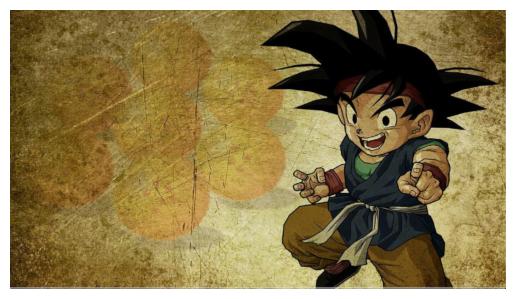

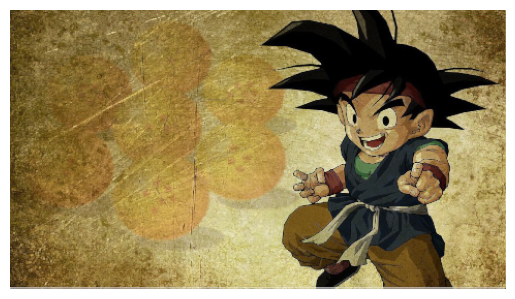

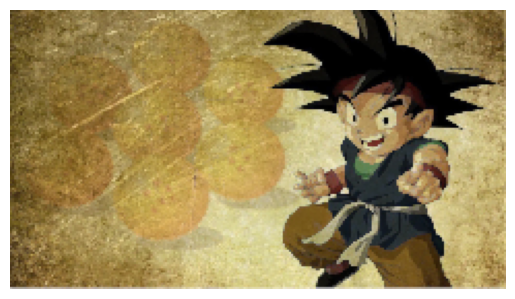

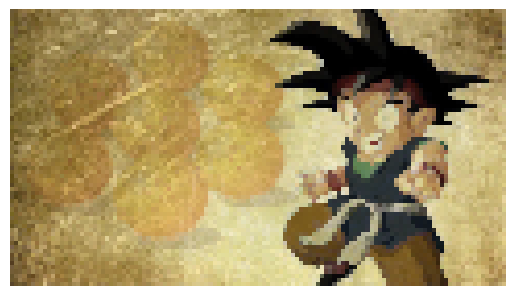

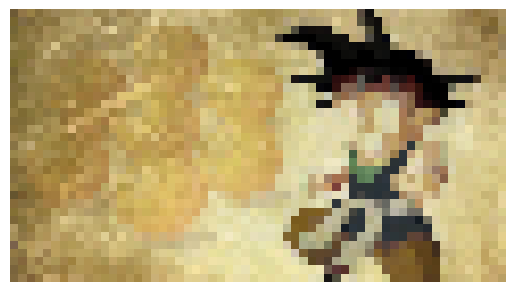

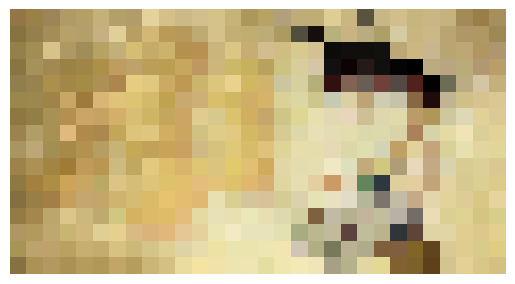

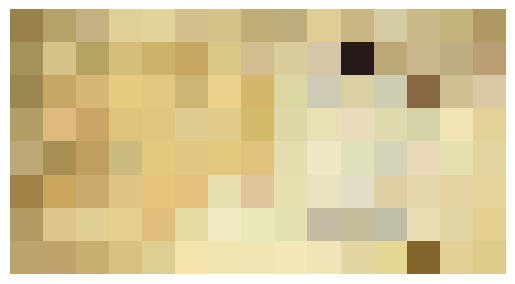

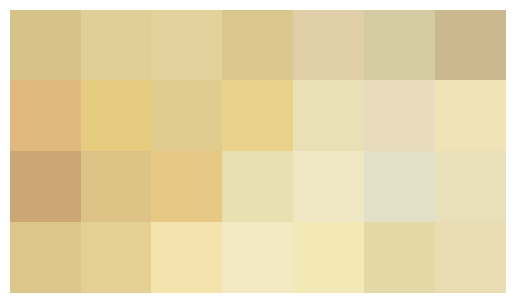

In [97]:
import matplotlib.pyplot as plt
image = Image.open("goku.jpg")

image_array = np.array(image)
for _ in range(8):
    output_image = max_pooling(image_array)
    image_array = output_image
    plt.imshow(output_image.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [108]:
import numpy as np

def conv2d(input_matrix, kernel, stride=(1, 1), padding=(0, 0)):
    """
    Performs 2D convolution on the input matrix.

    Parameters:
    input_matrix (numpy.ndarray): The input matrix.
    kernel (numpy.ndarray): The convolution kernel.
    stride (tuple): The stride of the convolution operation, default is (1, 1).
    padding (tuple): The amount of padding along the height and width, default is (0, 0).

    Returns:
    numpy.ndarray: The convolved matrix.
    """
    input_height, input_width , channels= input_matrix.shape
    kernel_height, kernel_width = kernel.shape
    stride_height, stride_width = stride
    padding_height, padding_width = padding

    
    output_height = int((input_height + 2 * padding_height - kernel_height) / stride_height) + 1
    output_width = int((input_width + 2 * padding_width - kernel_width) / stride_width) + 1



    output_matrix = np.zeros((output_height, output_width))
    for k in range(channels):
        for i in range(0, output_height):
            for j in range(0, output_width):
                start_i = i * stride_height
                start_j = j * stride_width
                end_i = start_i + kernel_height
                end_j = start_j + kernel_width
                output_matrix[i, j] = np.sum(input_matrix[start_i:end_i, start_j:end_j] * kernel)

    return output_matrix


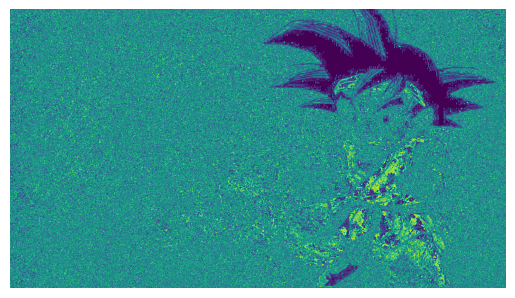

In [110]:
import matplotlib.pyplot as plt
image = Image.open("goku.jpg")

image_array = np.array(image)

output_image = conv2d(image_array,np.array([[-1,0,1],[2,1,2],[1,-2,0]]))
plt.imshow(output_image.astype(np.uint8))
plt.axis('off')
plt.show()

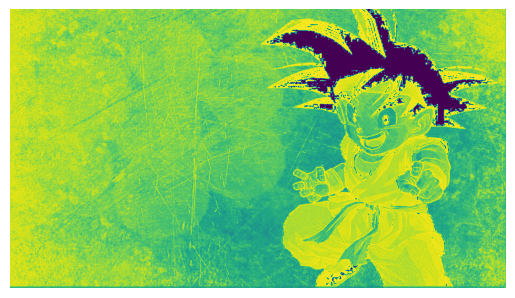

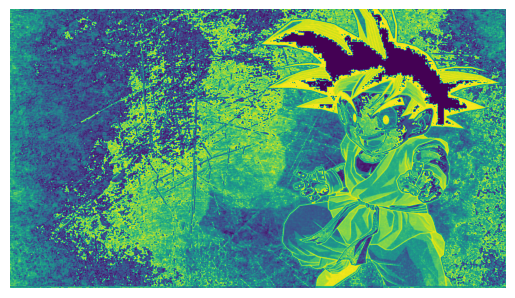

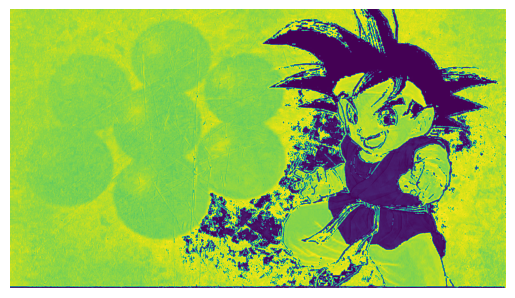

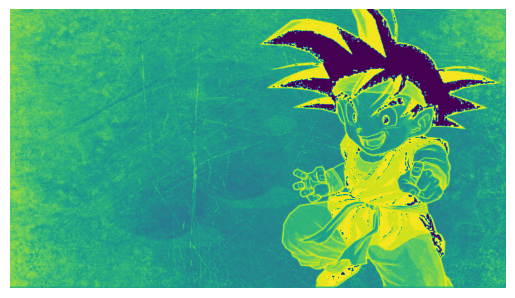

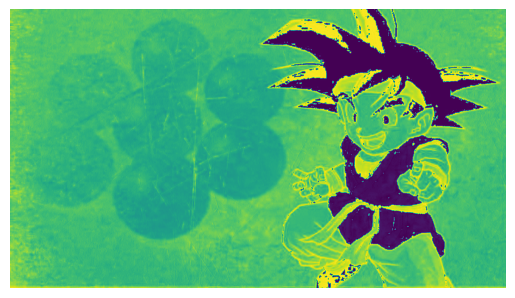

In [116]:
import matplotlib.pyplot as plt
image = Image.open("goku.jpg")

image_array = np.array(image)

num_filters = 5

random_filters = np.random.randn(num_filters, 3, 3) / 9

for i in range(num_filters):
    output_image = conv2d(image_array,random_filters[i])
    plt.imshow(output_image.astype(np.uint8))
    plt.axis('off')
    plt.show()

